# Importing Required Libraries and Dataset:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_multilabel_classification

In [2]:
df = pd.read_csv("Global Power Plant Database.csv")
df.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.7470,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.3700,6243.000000,5385.579736,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,...,WRI,NaN,2018.0,821.798000,1153.421000,1208.8520,1175.765000,1147.913000,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,...,WRI,NaN,2018.0,147.568450,157.558250,152.1952,61.421350,89.629600,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,NaN,...,WRI,NaN,2018.0,696.738800,674.391100,721.3352,675.724400,679.594950,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,NaN,NaN,...,WRI,NaN,2018.0,504.813250,480.594950,144.4342,402.029750,439.372100,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,Oil,NaN,...,WRI,NaN,2018.0,2642.322000,1887.904000,1643.0460,1338.093000,1563.457000,Central Electricity Authority,NaN


# Checking Null Values in the dataframe.

In [3]:
# here we can check sum of columns but in our data there will a problem detected like null,NaN value are avail details are below
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [4]:
# we are checking data types of our data details.
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [5]:
# To check the NaN values in our data so here we can see so many rows are avail as NaN,Null.
df.isnull()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,False,False,False,False,False,False,False,False,True,True,...,False,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,...,False,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,True,True,...,False,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,True,...,False,True,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,False,False,False,False,False,False,False,False,False,True,...,False,True,False,True,True,False,False,False,False,True
904,False,False,False,False,False,False,False,False,True,True,...,False,True,True,True,True,True,True,True,True,True
905,False,False,False,False,False,False,False,False,True,True,...,False,True,True,True,True,True,True,True,True,True
906,False,False,False,False,False,False,False,False,True,True,...,False,True,True,True,True,True,True,True,True,True


Here we found so many Null values in our data details are above.

In [6]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
# we can check unique values of primary_fuel that how many subcategory is available in primary_fuel.
df["primary_fuel"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [8]:
# Here we are encode some data which is need to encode it
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()

In [9]:
# use LabelEncoder.
df['primary_fuel']=le.fit_transform(df['primary_fuel'])
df['other_fuel1']=le.fit_transform(df['other_fuel1'])
df['other_fuel2']=le.fit_transform(df['other_fuel2'])
df['geolocation_source']=le.fit_transform(df['geolocation_source'])
df['year_of_capacity_data']=le.fit_transform(df['year_of_capacity_data'])
df['generation_data_source']=le.fit_transform(df['generation_data_source'])
df['gppd_idnr']=le.fit_transform(df['gppd_idnr'])
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,658,2.5,28.1839,73.2407,6,3,1,...,1,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN
1,IND,India,ADITYA CEMENT WORKS,520,98.0,24.7663,74.6090,1,3,1,...,2,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN
2,IND,India,AES Saurashtra Windfarms,854,39.2,21.9038,69.3732,7,3,1,...,2,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN
3,IND,India,AGARTALA GT,0,135.0,23.8712,91.3602,2,3,1,...,2,NaN,0,631.777928,617.789264,843.747,886.004428,663.774500,0,NaN
4,IND,India,AKALTARA TPP,1,1800.0,21.9603,82.4091,1,2,1,...,2,NaN,0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,0,NaN


In the data there is one colums available which is 'wepp_id','other_fuel2','wepp_id','estimated_generation_gwh' we are dropping this columns because this columns is fill with 100% NaN values.

In [10]:
# this columns are avail in object format hence because some data are missing in the list and its filled with NaN so firstly we will fill the NaN values.
df.year_of_capacity_data.head()

0    1
1    1
2    1
3    0
4    0
Name: year_of_capacity_data, dtype: int64

In [11]:
df['year_of_capacity_data'].unique()

array([1, 0], dtype=int64)

In this data there are so many columns are available with NaN values like:-'other_fuel2','year_of_capacity_data','generation_data_source' and so many data is in categorical so firstly we will convert our data from categorical to integer and then we will use fillna technique to fill the NaN values.

In [12]:
#lets check our data after the convertion.
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,658,2.5,28.1839,73.2407,6,3,1,...,1,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN
1,IND,India,ADITYA CEMENT WORKS,520,98.0,24.7663,74.6090,1,3,1,...,2,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN
2,IND,India,AES Saurashtra Windfarms,854,39.2,21.9038,69.3732,7,3,1,...,2,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN
3,IND,India,AGARTALA GT,0,135.0,23.8712,91.3602,2,3,1,...,2,NaN,0,631.777928,617.789264,843.747,886.004428,663.774500,0,NaN
4,IND,India,AKALTARA TPP,1,1800.0,21.9603,82.4091,1,2,1,...,2,NaN,0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,0,NaN


In [13]:
#fill the nan values
df['year_of_capacity_data']=df['year_of_capacity_data'].fillna((df['year_of_capacity_data'].median()))
df['generation_data_source']=df['generation_data_source'].fillna((df['generation_data_source'].median()))
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna((df['generation_gwh_2013'].median()))
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna((df['generation_gwh_2014'].median()))
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna((df['generation_gwh_2015'].median()))
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna((df['generation_gwh_2016'].median()))
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna((df['generation_gwh_2017'].median()))
df['latitude']=df['latitude'].fillna((df['latitude'].median()))
df['longitude']=df['longitude'].fillna((df['longitude'].median()))
df['commissioning_year']=df['commissioning_year'].fillna((df['commissioning_year'].median()))
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,658,2.5,28.1839,73.2407,6,3,1,...,1,NaN,1,797.063475,805.760000,701.02725,716.728350,807.601700,1,NaN
1,IND,India,ADITYA CEMENT WORKS,520,98.0,24.7663,74.6090,1,3,1,...,2,NaN,1,797.063475,805.760000,701.02725,716.728350,807.601700,1,NaN
2,IND,India,AES Saurashtra Windfarms,854,39.2,21.9038,69.3732,7,3,1,...,2,NaN,1,797.063475,805.760000,701.02725,716.728350,807.601700,1,NaN
3,IND,India,AGARTALA GT,0,135.0,23.8712,91.3602,2,3,1,...,2,NaN,0,631.777928,617.789264,843.74700,886.004428,663.774500,0,NaN
4,IND,India,AKALTARA TPP,1,1800.0,21.9603,82.4091,1,2,1,...,2,NaN,0,1668.290000,3035.550000,5916.37000,6243.000000,5385.579736,0,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    int32  
 4   capacity_mw               908 non-null    float64
 5   latitude                  908 non-null    float64
 6   longitude                 908 non-null    float64
 7   primary_fuel              908 non-null    int32  
 8   other_fuel1               908 non-null    int32  
 9   other_fuel2               908 non-null    int32  
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        908 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [15]:
# we are dropping some columns which is not relevent for our analysis.
df=df.drop(["country","country_long","name","owner","source","url","other_fuel2","other_fuel3","wepp_id","estimated_generation_gwh"],axis=1)
df

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,658,2.5,28.1839,73.2407,6,3,2011.0,1,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
1,520,98.0,24.7663,74.6090,1,3,2000.0,2,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
2,854,39.2,21.9038,69.3732,7,3,2000.0,2,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
3,0,135.0,23.8712,91.3602,2,3,2004.0,2,0,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,1,1800.0,21.9603,82.4091,1,2,2015.0,2,0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,494,1600.0,16.2949,77.3568,1,2,2016.0,2,0,797.063475,805.760000,0.994875,233.596650,865.400000,0
904,823,3.0,12.8932,78.1654,6,3,2000.0,0,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
905,892,25.5,15.2758,75.5811,7,3,2000.0,2,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
906,540,80.0,24.3500,73.7477,1,3,2000.0,2,1,797.063475,805.760000,701.027250,716.728350,807.601700,1


In [16]:
# There is no null or NaN values are avail in our data.
df.isnull()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
904,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
905,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
906,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
df.head(2)

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,658,2.5,28.1839,73.2407,6,3,2011.0,1,1,797.063475,805.76,701.02725,716.72835,807.6017,1
1,520,98.0,24.7663,74.6090,1,3,2000.0,2,1,797.063475,805.76,701.02725,716.72835,807.6017,1


In [18]:
df.isnull().sum()

gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

In [19]:
df['primary_fuel'].unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

In [20]:
df.primary_fuel

0      6
1      1
2      7
3      2
4      1
      ..
903    1
904    6
905    7
906    1
907    7
Name: primary_fuel, Length: 908, dtype: int32

There is no null value in our data or Target value so we will go for EDA visualization for our data to check the details or analysis.

In [21]:
df.keys()

Index(['gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'commissioning_year', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_data_source'],
      dtype='object')

# EDA

# ScatterPlot:

<AxesSubplot:xlabel='gppd_idnr', ylabel='primary_fuel'>

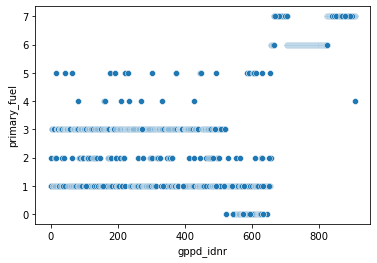

In [22]:
sns.scatterplot(x="gppd_idnr",y="primary_fuel",data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

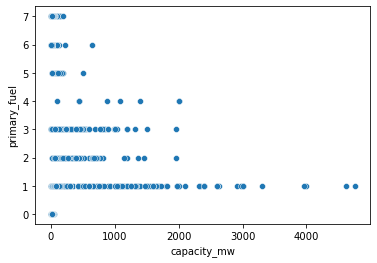

In [23]:
sns.scatterplot(x="capacity_mw",y="primary_fuel",data=df)

<AxesSubplot:xlabel='latitude', ylabel='primary_fuel'>

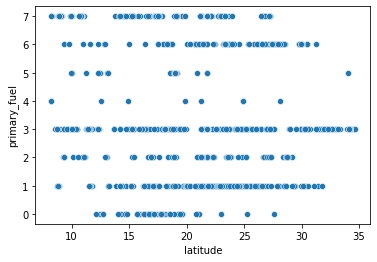

In [24]:
sns.scatterplot(x="latitude",y="primary_fuel",data=df)

<AxesSubplot:xlabel='longitude', ylabel='primary_fuel'>

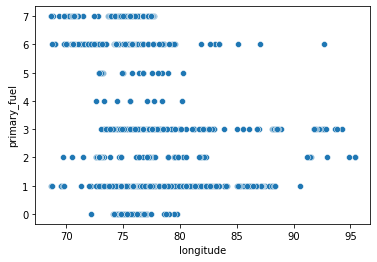

In [25]:
sns.scatterplot(x="longitude",y="primary_fuel",data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='primary_fuel'>

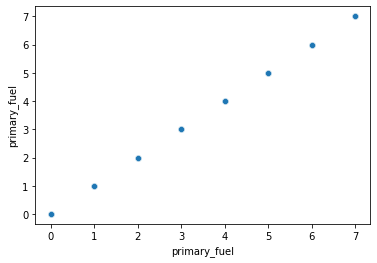

In [26]:
sns.scatterplot(x="primary_fuel",y="primary_fuel",data=df)

<AxesSubplot:xlabel='other_fuel1', ylabel='primary_fuel'>

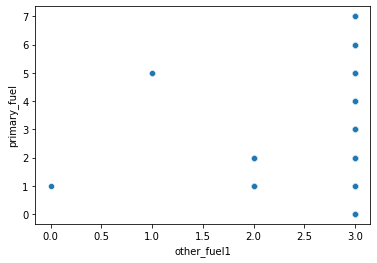

In [27]:
sns.scatterplot(x="other_fuel1",y="primary_fuel",data=df)

<AxesSubplot:xlabel='commissioning_year', ylabel='primary_fuel'>

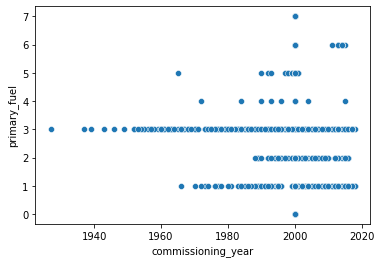

In [28]:
sns.scatterplot(x="commissioning_year",y="primary_fuel",data=df)

<AxesSubplot:xlabel='geolocation_source', ylabel='primary_fuel'>

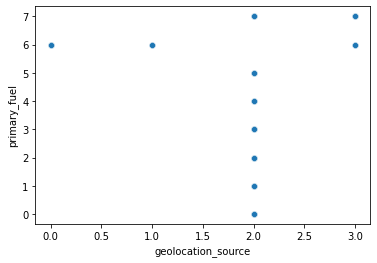

In [29]:
sns.scatterplot(x="geolocation_source",y="primary_fuel",data=df)

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='primary_fuel'>

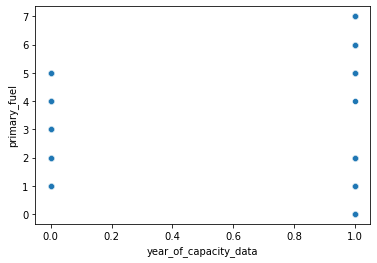

In [30]:
sns.scatterplot(x="year_of_capacity_data",y="primary_fuel",data=df)

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='primary_fuel'>

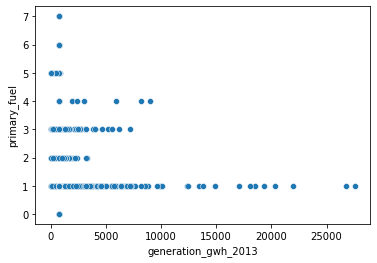

In [31]:
sns.scatterplot(x="generation_gwh_2013",y="primary_fuel",data=df)

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='primary_fuel'>

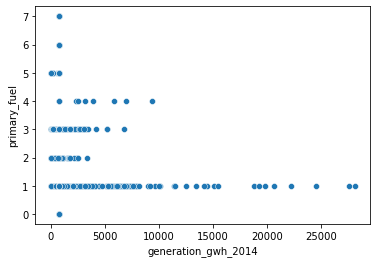

In [32]:
sns.scatterplot(x="generation_gwh_2014",y="primary_fuel",data=df)

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='primary_fuel'>

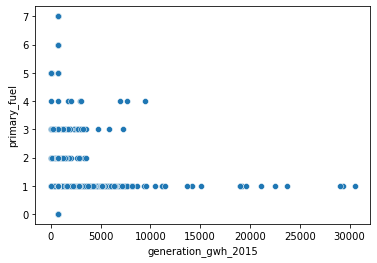

In [33]:
sns.scatterplot(x="generation_gwh_2015",y="primary_fuel",data=df)

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='primary_fuel'>

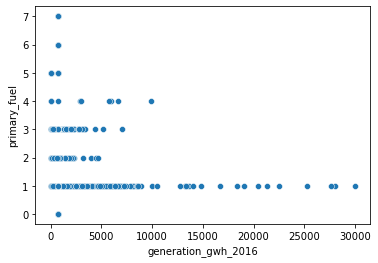

In [34]:
sns.scatterplot(x="generation_gwh_2016",y="primary_fuel",data=df)

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='primary_fuel'>

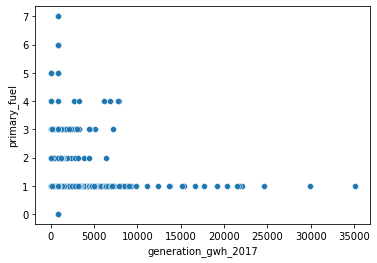

In [35]:
import seaborn as sns
sns.scatterplot(x="generation_gwh_2017",y="primary_fuel",data=df)

<AxesSubplot:xlabel='generation_data_source', ylabel='primary_fuel'>

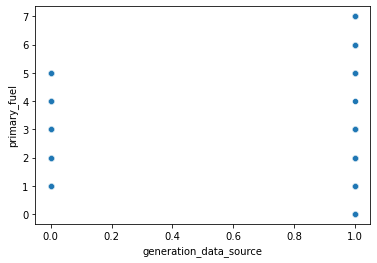

In [36]:
sns.scatterplot(x="generation_data_source",y="primary_fuel",data=df)

In [37]:
df_visualization_nominal=df[['gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_data_source']]

In [38]:
df_visualization_nominal.head(2)

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,658,2.5,28.1839,73.2407,6,3,2011.0,1,1,797.063475,805.76,701.02725,716.72835,807.6017,1
1,520,98.0,24.7663,74.6090,1,3,2000.0,2,1,797.063475,805.76,701.02725,716.72835,807.6017,1


3    709
2    196
1      2
0      1
Name: other_fuel1, dtype: int64


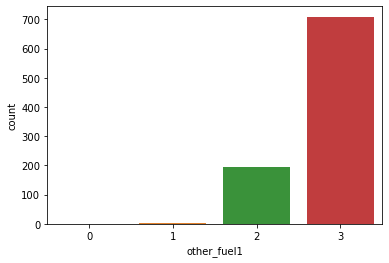

In [39]:
ax = sns.countplot(x="other_fuel1",data=df_visualization_nominal)
print(df_visualization_nominal["other_fuel1"].value_counts())

2    766
0    119
3     19
1      4
Name: geolocation_source, dtype: int64


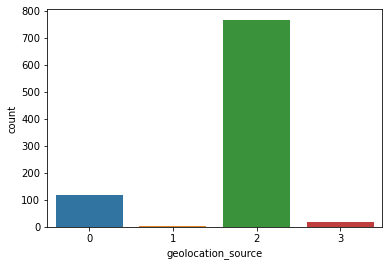

In [40]:
ax = sns.countplot(x="geolocation_source",data=df_visualization_nominal)
print(df_visualization_nominal["geolocation_source"].value_counts())

0    520
1    388
Name: year_of_capacity_data, dtype: int64


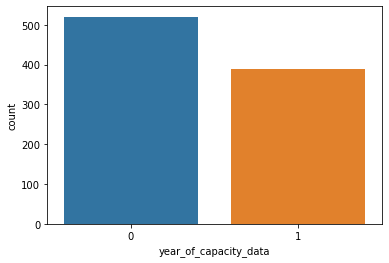

In [41]:
ax = sns.countplot(x="year_of_capacity_data",data=df_visualization_nominal)
print(df_visualization_nominal["year_of_capacity_data"].value_counts())

1    458
0    450
Name: generation_data_source, dtype: int64


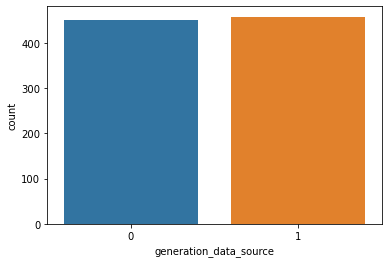

In [42]:
ax = sns.countplot(x="generation_data_source",data=df_visualization_nominal)
print(df_visualization_nominal["generation_data_source"].value_counts())

From the above observation the total number of generation data source is 1(NaN) is 458 and 0(Central Electricity Authority) is 450.

In [43]:
df.corr()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
gppd_idnr,1.000000,-0.334308,-0.105275,-0.381087,0.607373,0.367919,0.140865,-0.410407,0.856826,-0.155146,-0.160279,-0.176156,-0.187756,-0.183912,0.735795
capacity_mw,-0.334308,1.000000,0.047608,0.200473,-0.377783,-0.598462,0.215667,0.183286,-0.416879,0.756523,0.804581,0.830400,0.863989,0.877058,-0.494694
latitude,-0.105275,0.047608,1.000000,0.030775,-0.010793,-0.036834,0.084220,-0.173347,-0.078930,0.053106,0.057527,0.052797,0.046684,0.056430,-0.084126
longitude,-0.381087,0.200473,0.030775,1.000000,-0.352749,-0.279925,0.035731,0.236711,-0.426369,0.102637,0.107967,0.125723,0.148405,0.156255,-0.412071
primary_fuel,0.607373,-0.377783,-0.010793,-0.352749,1.000000,0.477575,-0.065716,-0.419911,0.500012,-0.228761,-0.240407,-0.249826,-0.260900,-0.263818,0.481758
other_fuel1,0.367919,-0.598462,-0.036834,-0.279925,0.477575,1.000000,-0.258445,-0.182706,0.449480,-0.423932,-0.451019,-0.461464,-0.482225,-0.493602,0.524955
commissioning_year,0.140865,0.215667,0.084220,0.035731,-0.065716,-0.258445,1.000000,-0.048154,0.138159,0.052258,0.086131,0.118738,0.151269,0.164514,0.002992
geolocation_source,-0.410407,0.183286,-0.173347,0.236711,-0.419911,-0.182706,-0.048154,1.000000,-0.406483,0.086918,0.090000,0.094359,0.097685,0.096969,-0.348041
year_of_capacity_data,0.856826,-0.416879,-0.078930,-0.426369,0.500012,0.449480,0.138159,-0.406483,1.000000,-0.213830,-0.221411,-0.232135,-0.240317,-0.238557,0.856225
generation_gwh_2013,-0.155146,0.756523,0.053106,0.102637,-0.228761,-0.423932,0.052258,0.086918,-0.213830,1.000000,0.970385,0.907385,0.878836,0.839297,-0.249735


<AxesSubplot:>

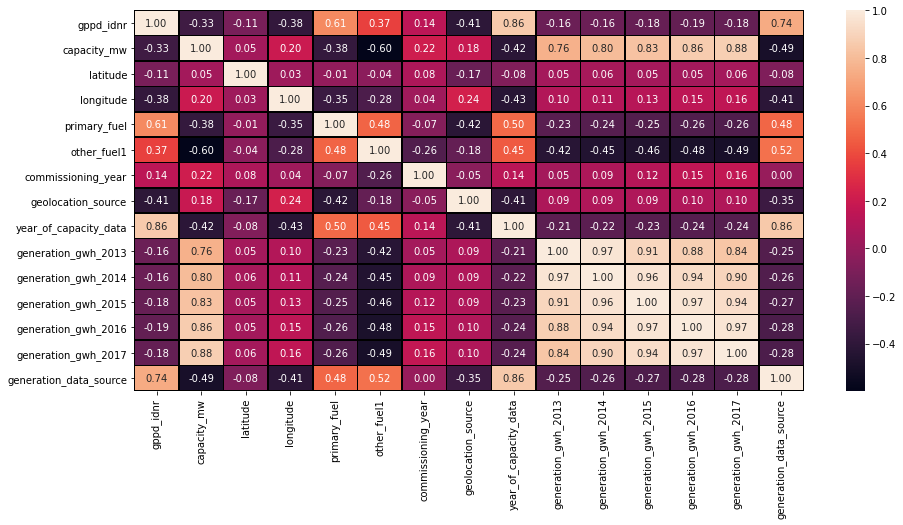

In [44]:
#Correlation using heatmap

plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidth=0.5,linecolor="black", fmt='.2f')

In [45]:
df.describe()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
count,908.00000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,453.50000,321.046378,21.225679,77.410936,3.205947,2.776432,1998.183921,1.754405,0.427313,1434.383254,1518.830440,1502.838018,1552.807503,1648.790766,0.504405
std,262.26132,580.221767,6.089450,4.783873,2.281339,0.429886,13.085938,0.699844,0.494961,2575.982982,2783.474774,2985.277178,3006.880849,3047.577626,0.500256
min,0.00000,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,226.75000,16.837500,17.057825,74.390250,1.000000,3.000000,1997.000000,2.000000,0.000000,797.063475,805.760000,701.027250,716.728350,807.601700,0.000000
50%,453.50000,60.000000,21.778300,76.719250,3.000000,3.000000,2000.000000,2.000000,0.000000,797.063475,805.760000,701.027250,716.728350,807.601700,1.000000
75%,680.25000,388.125000,25.183775,79.211600,6.000000,3.000000,2003.000000,2.000000,1.000000,797.063475,805.760000,701.027250,716.728350,807.601700,1.000000
max,907.00000,4760.000000,34.649000,95.408000,7.000000,3.000000,2018.000000,3.000000,1.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,1.000000


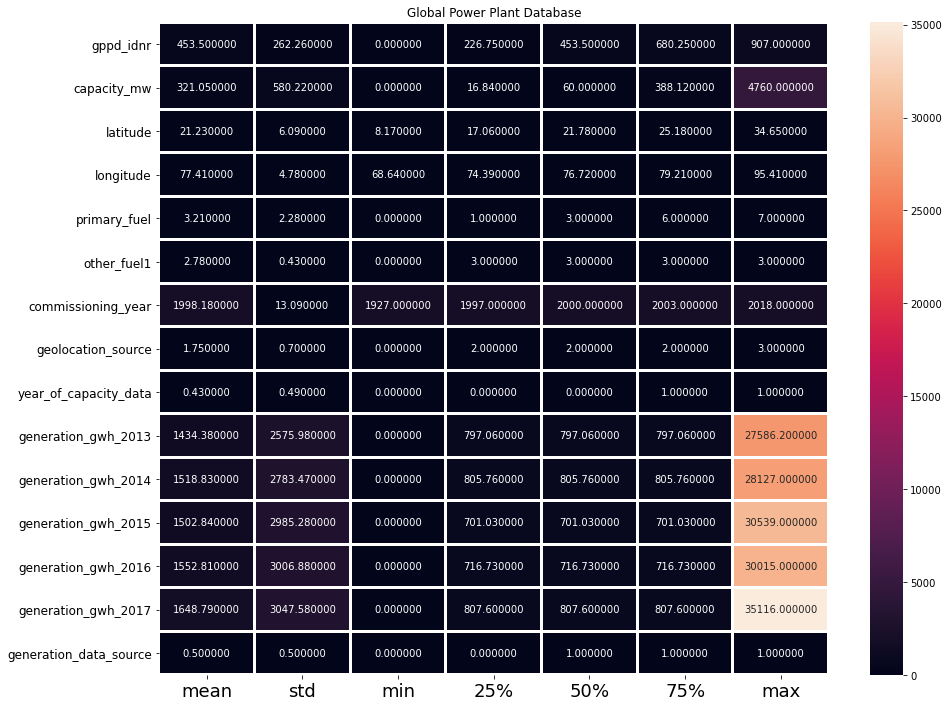

In [46]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Global Power Plant Database")
plt.show()

# Checking the distribution of the continuous value of the float type columns

<AxesSubplot:xlabel='gppd_idnr', ylabel='Density'>

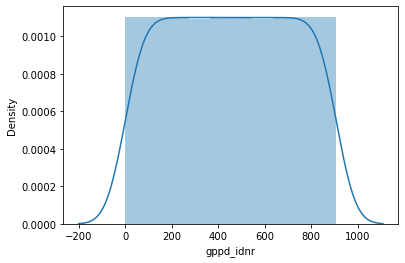

In [47]:
sns.distplot(df['gppd_idnr'])

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

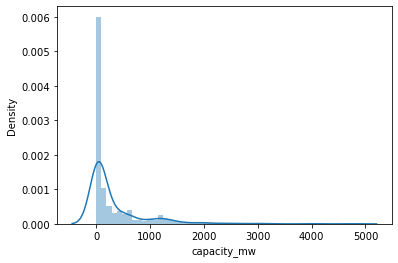

In [48]:
sns.distplot(df['capacity_mw'])

<AxesSubplot:xlabel='latitude', ylabel='Density'>

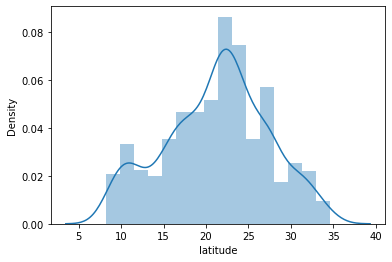

In [49]:
sns.distplot(df['latitude'])

<AxesSubplot:xlabel='longitude', ylabel='Density'>

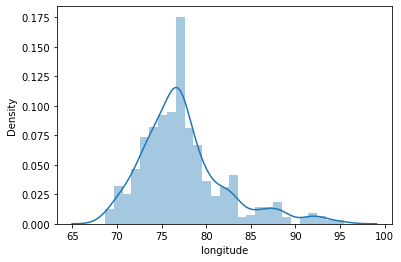

In [50]:
sns.distplot(df['longitude'])

<AxesSubplot:xlabel='primary_fuel', ylabel='Density'>

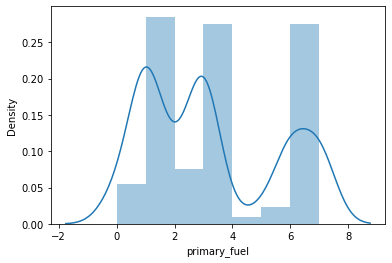

In [51]:
sns.distplot(df['primary_fuel'])

<AxesSubplot:xlabel='other_fuel1', ylabel='Density'>

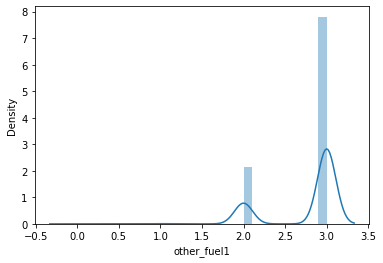

In [52]:
sns.distplot(df['other_fuel1'])

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

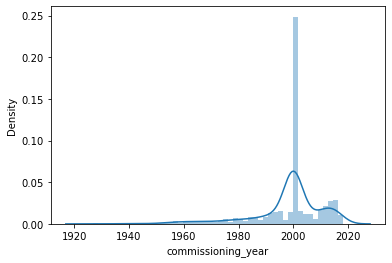

In [53]:
sns.distplot(df['commissioning_year'])

<AxesSubplot:xlabel='geolocation_source', ylabel='Density'>

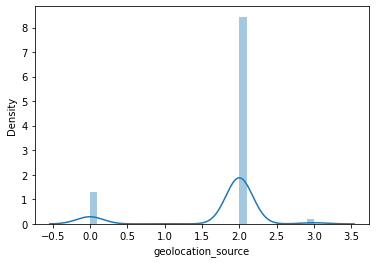

In [54]:
sns.distplot(df['geolocation_source'])

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='Density'>

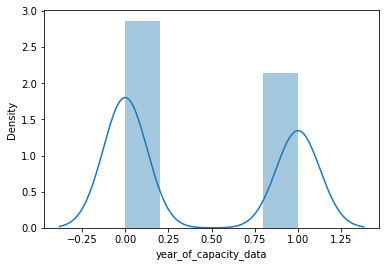

In [55]:
sns.distplot(df['year_of_capacity_data'])

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

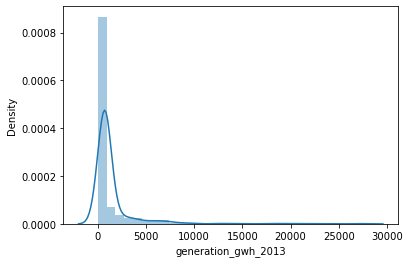

In [56]:
sns.distplot(df['generation_gwh_2013'])

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

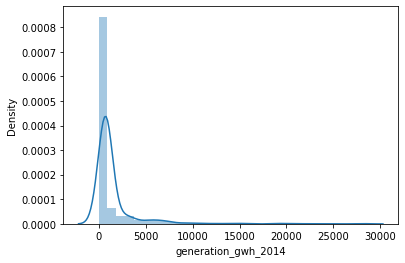

In [57]:
sns.distplot(df['generation_gwh_2014'])

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

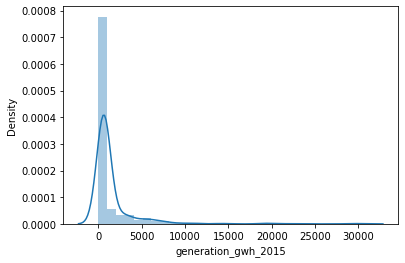

In [58]:
sns.distplot(df['generation_gwh_2015'])

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

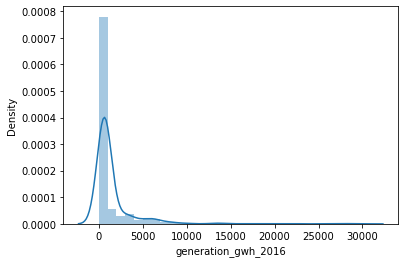

In [59]:
sns.distplot(df['generation_gwh_2016'])

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

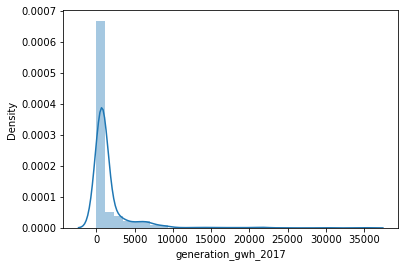

In [60]:
sns.distplot(df['generation_gwh_2017'])

<AxesSubplot:xlabel='generation_data_source', ylabel='Density'>

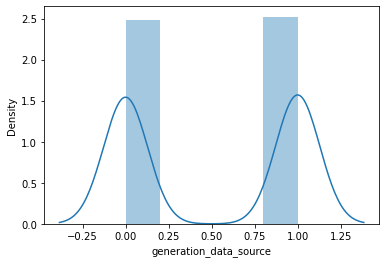

In [61]:
sns.distplot(df['generation_data_source'])

In [62]:
# check the skewness
df.skew()

gppd_idnr                 0.000000
capacity_mw               3.193257
latitude                 -0.161811
longitude                 1.150963
primary_fuel              0.471141
other_fuel1              -1.619441
commissioning_year       -1.650230
geolocation_source       -1.922080
year_of_capacity_data     0.294357
generation_gwh_2013       5.535740
generation_gwh_2014       5.325540
generation_gwh_2015       5.565770
generation_gwh_2016       5.278233
generation_gwh_2017       5.312975
generation_data_source   -0.017651
dtype: float64

In [63]:
delete = pd.DataFrame([["-0.010793","latitude","No","Alot"],["-0.065716","commissioning_year","No","Alot"],["-0.228761","generation_gwh_2013","No","Alot"],["-0.240407","generation_gwh_2014","No","Alot"],["-0.249826","generation_gwh_2015","No","Alot"],["-0.260900","generation_gwh_2016","No","Alot"],["-0.263818","generation_gwh_2017","No","Alot"],["-0.419911","geolocation_source","No","Alot"]],columns=["Correlation with Target","Column Name","Normalised","Outliers"])
delete

,Correlation with Target,Column Name,Normalised,Outliers
0,-0.010793,latitude,No,Alot
1,-0.065716,commissioning_year,No,Alot
2,-0.228761,generation_gwh_2013,No,Alot
3,-0.240407,generation_gwh_2014,No,Alot
4,-0.249826,generation_gwh_2015,No,Alot
5,-0.260900,generation_gwh_2016,No,Alot
6,-0.263818,generation_gwh_2017,No,Alot
7,-0.419911,geolocation_source,No,Alot


In [64]:
# we are checking our data types here all the columns are avail in int or float format.
df.dtypes

gppd_idnr                   int32
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int32
other_fuel1                 int32
commissioning_year        float64
geolocation_source          int32
year_of_capacity_data       int64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source      int32
dtype: object

# Removing Outliers:

# Z-Score Technique

In [65]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))

In [66]:
threshold=3
np.where(z>3)

(array([ 15,  15,  15,  15, 144, 144, 144, 144, 144, 144, 159, 159, 180,
        184, 210, 210, 210, 210, 210, 210, 222, 240, 245, 309, 309, 309,
        309, 309, 309, 324, 334, 341, 343, 361, 364, 365, 365, 365, 365,
        365, 365, 372, 376, 389, 417, 428, 445, 455, 479, 483, 485, 494,
        494, 494, 494, 494, 494, 495, 495, 495, 495, 495, 495, 500, 520,
        530, 533, 533, 539, 542, 547, 575, 584, 593, 602, 622, 624, 639,
        649, 649, 649, 649, 649, 649, 658, 658, 658, 658, 658, 658, 696,
        696, 696, 696, 696, 707, 710, 722, 722, 722, 722, 722, 725, 725,
        725, 725, 725, 727, 727, 727, 727, 727, 727, 729, 787, 787, 787,
        787, 787, 787, 789, 808, 809, 809, 809, 809, 809, 809, 812, 814,
        818, 819, 848, 849, 849, 881, 881, 881, 881, 881, 881], dtype=int64),
 array([ 1, 11, 12, 13,  1,  9, 10, 11, 12, 13,  9, 10,  3,  3,  1,  9, 10,
        11, 12, 13,  6,  3,  3,  1,  9, 10, 11, 12, 13,  3,  3,  3,  6,  3,
         1,  1,  9, 10, 11, 12, 13,  6, 

In [67]:
df1=df[(z<3).all(axis=1)]

In [68]:
df1

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,658,2.5,28.1839,73.2407,6,3,2011.0,1,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
1,520,98.0,24.7663,74.6090,1,3,2000.0,2,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
2,854,39.2,21.9038,69.3732,7,3,2000.0,2,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
3,0,135.0,23.8712,91.3602,2,3,2004.0,2,0,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,1,1800.0,21.9603,82.4091,1,2,2015.0,2,0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,494,1600.0,16.2949,77.3568,1,2,2016.0,2,0,797.063475,805.760000,0.994875,233.596650,865.400000,0
904,823,3.0,12.8932,78.1654,6,3,2000.0,0,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
905,892,25.5,15.2758,75.5811,7,3,2000.0,2,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
906,540,80.0,24.3500,73.7477,1,3,2000.0,2,1,797.063475,805.760000,701.027250,716.728350,807.601700,1


In [69]:
df.shape

(908, 15)

# Percentage loss of data while removing ourliers

In [70]:
percentage_loss=((908-845)/908)*100
print(percentage_loss)

6.938325991189427


Since the percentage of outliers are less than 10 percent.

we can proceed with the outliers removable

In [71]:
x = df1[['gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'other_fuel1', 'commissioning_year', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_data_source']]
y = df1['primary_fuel']

In [72]:
x

,gppd_idnr,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,658,2.5,28.1839,73.2407,3,2011.0,1,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
1,520,98.0,24.7663,74.6090,3,2000.0,2,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
2,854,39.2,21.9038,69.3732,3,2000.0,2,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
3,0,135.0,23.8712,91.3602,3,2004.0,2,0,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,1,1800.0,21.9603,82.4091,2,2015.0,2,0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,494,1600.0,16.2949,77.3568,2,2016.0,2,0,797.063475,805.760000,0.994875,233.596650,865.400000,0
904,823,3.0,12.8932,78.1654,3,2000.0,0,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
905,892,25.5,15.2758,75.5811,3,2000.0,2,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
906,540,80.0,24.3500,73.7477,3,2000.0,2,1,797.063475,805.760000,701.027250,716.728350,807.601700,1


In [73]:
y

0      6
1      1
2      7
3      2
4      1
      ..
903    1
904    6
905    7
906    1
907    7
Name: primary_fuel, Length: 845, dtype: int32

# Removing skewness by transforming data.

In [74]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

# Regression Model Building:

In [75]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [76]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.47873746625557345
At random state 0, the testing accuracy is:- 0.3973814361721123


At random state 1, the training accuracy is:- 0.46538951201966094
At random state 1, the testing accuracy is:- 0.4701859045593625


At random state 2, the training accuracy is:- 0.45868527197344533
At random state 2, the testing accuracy is:- 0.4958426804517112


At random state 3, the training accuracy is:- 0.44612590520968765
At random state 3, the testing accuracy is:- 0.5439640651456839


At random state 4, the training accuracy is:- 0.46972191071600156
At random state 4, the testing accuracy is:- 0.4471010740361895


At random state 5, the training accuracy is:- 0.46660956532366904
At random state 5, the testing accuracy is:- 0.4633395400476491


At random state 6, the training accuracy is:- 0.47184982395731456
At random state 6, the testing accuracy is:- 0.4434201764219472


At random state 7, the training accuracy is:- 0.4678360172214583
At random s

Here is overfitting problem so we use Lasso,Ridge to solve this problem

# Approaching Regularization:

In [78]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score

rdg=Ridge(alpha=.0001,random_state=2)
rdg.fit(x_train,y_train)
rdg.score(x_train,y_train)

0.46020348050460147

In [79]:
rdg.coef_

array([ 1.14373321e+00, -6.33006628e-01,  4.68704801e-02, -3.97308986e-01,
        6.43128375e-01,  1.52074092e-04, -1.33206698e-01, -2.38865114e-01,
       -9.38938771e-02,  5.26101078e-02, -5.66395902e-02,  5.70293889e-02,
        1.62038919e-01, -5.58135215e-01])

In [80]:
predict=rdg.predict(x_test)

In [81]:
r2_score(y_test,predict)

0.49000640542422946

In [82]:
lso=Lasso(alpha=.0001,random_state=2)
lso.fit(x_train,y_train)
lso.score(x_train,y_train)

0.46020333807405445

In [83]:
predict1=lso.predict(x_test)

In [84]:
r2_score(y_test,predict1)

0.4900135609332279

In [85]:
ela=ElasticNet(alpha=.0001,random_state=2)
ela.fit(x_train,y_train)
ela.score(x_train,y_train)

0.4602034190341544

In [86]:
predict2=ela.predict(x_test)

In [87]:
r2_score(y_test,predict2)

0.4900134881120598

we used all the techniques which is resolve of overfitting and underfitting problems. i am going with "ElasticNet" which is given to us almost 0.4900134%.

In [88]:
#Cross_validation of the model:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is -0.3628808894822111 and accuracy score for training is 0.46020348050465154 and accuracy for the testing is 0.4900063962691741


At cross fold 3 the cv score is 0.23676184478232598 and accuracy score for training is 0.46020348050465154 and accuracy for the testing is 0.4900063962691741


At cross fold 4 the cv score is 0.32804818526306645 and accuracy score for training is 0.46020348050465154 and accuracy for the testing is 0.4900063962691741


At cross fold 5 the cv score is 0.344548894812989 and accuracy score for training is 0.46020348050465154 and accuracy for the testing is 0.4900063962691741


At cross fold 6 the cv score is 0.3788092641252765 and accuracy score for training is 0.46020348050465154 and accuracy for the testing is 0.4900063962691741


At cross fold 7 the cv score is 0.37500093913164173 and accuracy score for training is 0.46020348050465154 and accuracy for the testing is 0.4900063962691741


At cross fold 8 the cv score is 0.387833688

Since the number of folds don't have such impact on the accuracy and cv_score.So cv=5 is selected.

Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score

Approaching more regressors

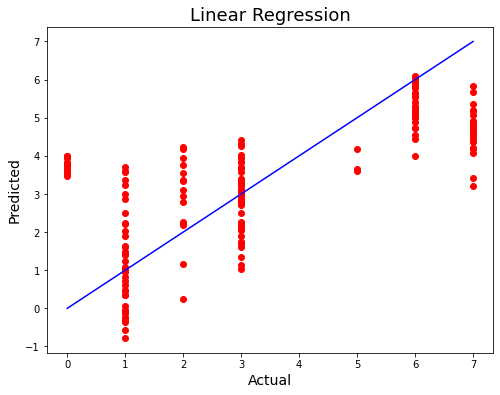

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

Best fit line is not covering most of the datapoints which shows normal fit for our model.

# Regularization:

In [90]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.svm import SVR

In [91]:
dtc = DecisionTreeRegressor()
dtc.fit(x_train,y_train)
print('dtc score:',dtc.score(x_train,y_train))

dtcpredict = dtc.predict(x_test)
print('dtc r2_score:', r2_score(y_test,dtcpredict))

print("Mean squared error of dtc =",mean_squared_error(y_test,dtcpredict))
print("Root Mean squared error of dtc =",np.sqrt(mean_squared_error(y_test,dtcpredict)))

dtc score: 1.0
dtc r2_score: 0.9375
Mean squared error of dtc = 0.34911242603550297
Root Mean squared error of dtc = 0.5908573652206621


In [92]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
print('dtc score:',knr.score(x_train,y_train))

knrpredict = knr.predict(x_test)
print('dtc r2_score:', r2_score(y_test,knrpredict))

print("Mean squared error of dtc =",mean_squared_error(y_test,knrpredict))
print("Root Mean squared error of dtc =",np.sqrt(mean_squared_error(y_test,knrpredict)))

dtc score: 0.9319996138585671
dtc r2_score: 0.9035593220338983
Mean squared error of dtc = 0.538698224852071
Root Mean squared error of dtc = 0.7339606425770192


In [93]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,random_state=42)
#RandomForestClassifier(100)----Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

print(predrf)

print('Rf score:',rf.score(x_train,y_train))

print('rf r2_score:', r2_score(y_test,predrf))

[0.13 2.92 6.   7.   6.   1.05 3.   1.   6.   7.   1.   3.04 1.13 2.9
 2.97 7.   7.   7.   1.03 3.   0.94 1.   2.22 6.   6.   1.   6.   1.
 1.   1.   1.06 0.79 0.39 2.39 1.02 2.62 6.   2.59 1.07 7.   7.   1.
 2.57 2.92 3.01 3.13 6.   7.   3.   2.82 3.06 1.03 6.   3.06 6.   1.16
 7.   0.37 0.9  2.69 3.   0.01 2.8  1.   2.93 6.   2.9  2.99 2.77 0.36
 7.   7.   7.   1.   2.95 2.99 2.95 1.02 1.   2.22 7.   1.   6.   2.85
 2.91 1.   1.   3.   7.   3.   0.94 6.   6.   7.   2.87 1.   2.98 3.25
 1.   5.95 1.   2.4  6.   6.   1.   1.   2.88 6.   1.   0.76 6.   2.06
 6.   5.75 3.   1.   2.97 0.41 7.   6.   2.95 3.   2.56 3.11 0.23 2.98
 2.96 6.   2.86 0.   2.78 0.72 2.93 1.   2.41 2.96 0.18 3.   7.   1.
 6.   1.09 6.   1.03 1.34 0.22 7.   0.25 6.   6.   2.82 7.   6.   6.
 6.   3.02 1.01 2.79 7.   6.   7.   1.01 2.75 3.   7.   7.   7.   1.
 7.  ]
Rf score: 0.9943949244396978
rf r2_score: 0.9505064618644068


In [94]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=50,random_state=42)

ada.fit(x_train,y_train)
predata=ada.predict(x_test)

print(predata)

print('Rf score: ',ada.score(x_train,y_train))
print('ADA r2_score:', r2_score(y_test,predata))

[1.20408163 2.99230769 6.         6.87878788 6.         1.76388889
 2.99230769 1.83606557 6.         6.90243902 1.83606557 2.99230769
 2.44331984 2.99230769 2.65753425 6.90243902 6.90243902 6.87179487
 1.58730159 2.99230769 1.43356643 2.13274336 2.5511811  6.
 6.         2.13274336 6.         2.13274336 1.75342466 2.13274336
 1.76388889 1.20408163 1.09411765 2.13274336 1.20408163 2.65753425
 6.         2.802589   1.82517483 6.90243902 6.87179487 1.76388889
 2.6        2.65753425 2.65753425 3.14007782 6.         6.90243902
 2.65753425 2.802589   3.14007782 1.625      6.         2.99230769
 6.         1.83606557 6.90243902 1.09411765 1.20408163 2.802589
 2.99230769 1.0855615  2.37378641 2.13274336 2.99230769 6.
 2.65753425 2.37378641 2.65753425 1.20408163 6.90243902 6.90243902
 6.90243902 2.13274336 2.99230769 2.802589   2.65753425 2.05970149
 2.13274336 2.65753425 6.90243902 2.13274336 6.         2.99230769
 2.99230769 1.83606557 2.13274336 2.65753425 6.87179487 2.802589
 1.20408163 6. 

In [95]:
from sklearn.ensemble import GradientBoostingRegressor
grid = GradientBoostingRegressor()

grid.fit(x_train,y_train)
predgrid=ada.predict(x_test)

print(predgrid)

print('Rf score: ',grid.score(x_train,y_train))

print('ADA r2_score:', r2_score(y_test,predgrid))

[1.20408163 2.99230769 6.         6.87878788 6.         1.76388889
 2.99230769 1.83606557 6.         6.90243902 1.83606557 2.99230769
 2.44331984 2.99230769 2.65753425 6.90243902 6.90243902 6.87179487
 1.58730159 2.99230769 1.43356643 2.13274336 2.5511811  6.
 6.         2.13274336 6.         2.13274336 1.75342466 2.13274336
 1.76388889 1.20408163 1.09411765 2.13274336 1.20408163 2.65753425
 6.         2.802589   1.82517483 6.90243902 6.87179487 1.76388889
 2.6        2.65753425 2.65753425 3.14007782 6.         6.90243902
 2.65753425 2.802589   3.14007782 1.625      6.         2.99230769
 6.         1.83606557 6.90243902 1.09411765 1.20408163 2.802589
 2.99230769 1.0855615  2.37378641 2.13274336 2.99230769 6.
 2.65753425 2.37378641 2.65753425 1.20408163 6.90243902 6.90243902
 6.90243902 2.13274336 2.99230769 2.802589   2.65753425 2.05970149
 2.13274336 2.65753425 6.90243902 2.13274336 6.         2.99230769
 2.99230769 1.83606557 2.13274336 2.65753425 6.87179487 2.802589
 1.20408163 6. 

# The best model is RandomForestRegressor.Since the difference between the percentage score of cross validation and r2_score is optimum.

# Model Saving:

In [96]:
# Saving our data.
import pickle
filename = 'gglobal power plant'
pickle.dump(lr, open(filename, 'wb'))

# Conclusion:

In [97]:
import numpy as np
a=np.array(y_test)
a

array([0, 3, 6, 7, 6, 1, 3, 1, 6, 7, 1, 3, 1, 3, 3, 7, 7, 7, 1, 3, 0, 1,
       2, 6, 6, 1, 6, 1, 1, 1, 1, 0, 0, 2, 1, 2, 6, 5, 1, 7, 7, 1, 3, 3,
       3, 3, 6, 7, 3, 3, 3, 2, 6, 3, 6, 1, 7, 0, 0, 2, 3, 0, 3, 1, 3, 6,
       3, 3, 3, 0, 7, 7, 7, 1, 3, 3, 3, 1, 1, 2, 7, 1, 6, 3, 3, 1, 1, 2,
       7, 3, 0, 6, 6, 7, 3, 1, 3, 3, 1, 6, 1, 5, 6, 6, 1, 1, 3, 6, 1, 1,
       6, 2, 6, 2, 3, 1, 3, 2, 7, 6, 3, 3, 5, 3, 1, 3, 2, 6, 3, 0, 3, 0,
       3, 1, 2, 3, 1, 3, 7, 1, 6, 1, 6, 1, 2, 0, 7, 0, 6, 6, 2, 7, 6, 6,
       6, 3, 1, 3, 7, 6, 7, 1, 3, 3, 7, 7, 7, 1, 7])

In [98]:
predicted=np.array(lr.predict(x_test))
predicted

array([ 3.79651873,  2.8331226 ,  5.59929342,  4.76637043,  5.11346583,
       -0.22936633,  3.35618619, -0.04587385,  5.62049757,  4.86788355,
        0.05293823,  3.39933645,  3.22709149,  2.05728397,  4.00970516,
        5.66455975,  5.08359203,  3.21733667,  3.57226293,  2.84353972,
        3.84404568,  1.62446005,  2.95250723,  6.08702477,  5.03884257,
       -0.08504156,  5.76880725,  1.61299381,  2.51361437,  1.0512106 ,
       -0.11562119,  3.5479688 ,  3.73641812,  3.37117231,  2.20983128,
        2.27506368,  4.8944292 ,  3.6528945 ,  2.88085368,  4.66200551,
        3.42022552,  0.47860049,  3.67409162,  1.61195173,  1.35808349,
        3.00237937,  6.07979851,  4.64250833,  4.30095193,  1.73202233,
        2.81686067,  2.78460384,  5.64764427,  2.71085381,  5.65779857,
        3.00862379,  4.91353218,  3.70815967,  3.95290323,  3.55436418,
        2.99588716,  4.00280806,  1.14034189,  1.40087413,  2.05105826,
        5.55454311,  3.24450928,  3.70845219,  3.84819779,  3.60

In [99]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index=range(len(a)))

In [100]:
df_com.head(10)

,original,predicted
0,0,3.796519
1,3,2.833123
2,6,5.599293
3,7,4.766370
4,6,5.113466
5,1,-0.229366
6,3,3.356186
7,1,-0.045874
8,6,5.620498
9,7,4.867884


# from the above table the model is predicted the value with 90-95 percent accuracy.

# Second Point 

In [101]:
df1          #Target_value=capacity_mw  this is continuous data.

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,658,2.5,28.1839,73.2407,6,3,2011.0,1,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
1,520,98.0,24.7663,74.6090,1,3,2000.0,2,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
2,854,39.2,21.9038,69.3732,7,3,2000.0,2,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
3,0,135.0,23.8712,91.3602,2,3,2004.0,2,0,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,1,1800.0,21.9603,82.4091,1,2,2015.0,2,0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,494,1600.0,16.2949,77.3568,1,2,2016.0,2,0,797.063475,805.760000,0.994875,233.596650,865.400000,0
904,823,3.0,12.8932,78.1654,6,3,2000.0,0,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
905,892,25.5,15.2758,75.5811,7,3,2000.0,2,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
906,540,80.0,24.3500,73.7477,1,3,2000.0,2,1,797.063475,805.760000,701.027250,716.728350,807.601700,1


<AxesSubplot:xlabel='gppd_idnr', ylabel='capacity_mw'>

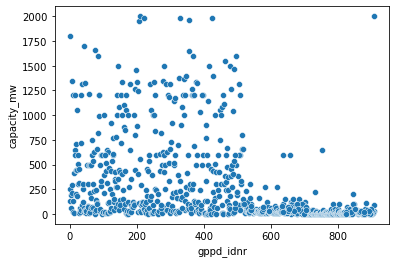

In [102]:
import seaborn as sns
sns.scatterplot(x='gppd_idnr',y='capacity_mw',data=df1)

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

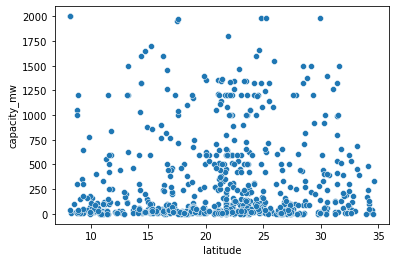

In [103]:
sns.scatterplot(x='latitude',y='capacity_mw',data=df1)

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

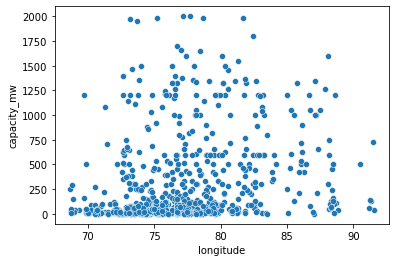

In [104]:
sns.scatterplot(x='longitude',y='capacity_mw',data=df1)

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

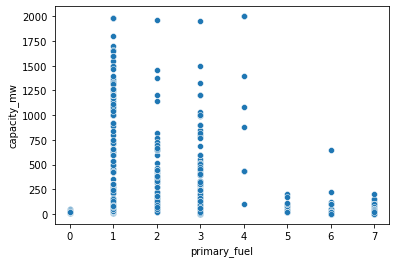

In [105]:
sns.scatterplot(x='primary_fuel',y='capacity_mw',data=df1)

<AxesSubplot:xlabel='other_fuel1', ylabel='capacity_mw'>

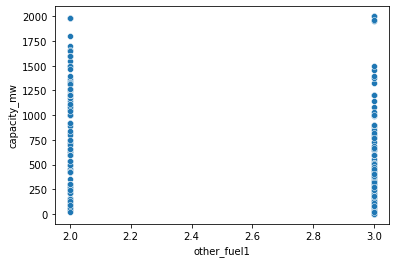

In [106]:
sns.scatterplot(x='other_fuel1',y='capacity_mw',data=df1)

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

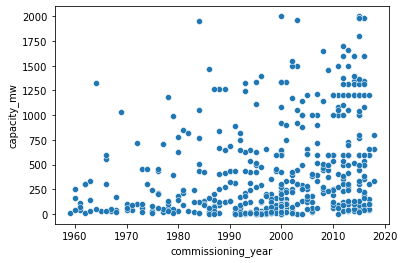

In [107]:
sns.scatterplot(x='commissioning_year',y='capacity_mw',data=df1)

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='capacity_mw'>

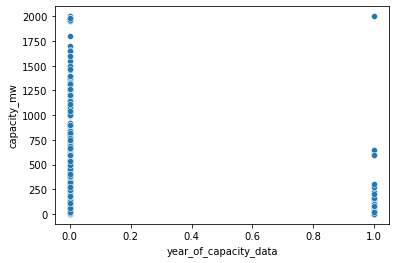

In [108]:
sns.scatterplot(x='year_of_capacity_data',y='capacity_mw',data=df1)

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='capacity_mw'>

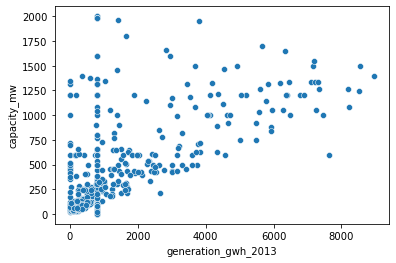

In [109]:
sns.scatterplot(x='generation_gwh_2013',y='capacity_mw',data=df1)

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='capacity_mw'>

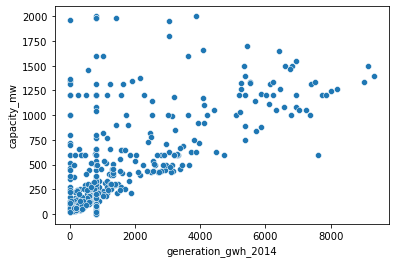

In [110]:
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',data=df1)

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='capacity_mw'>

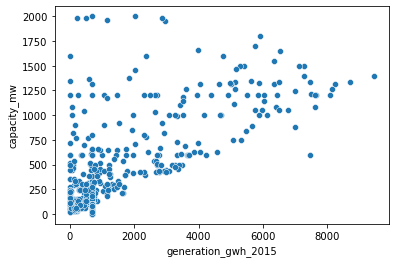

In [111]:
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',data=df1)

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='capacity_mw'>

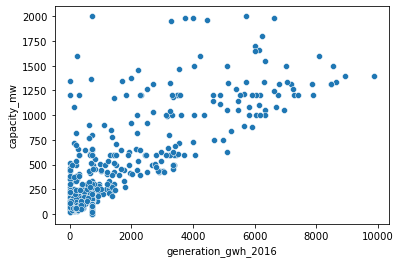

In [112]:
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',data=df1)

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

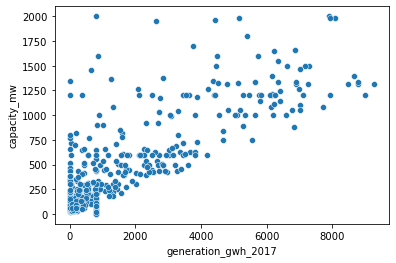

In [113]:
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',data=df1)

<AxesSubplot:xlabel='generation_data_source', ylabel='capacity_mw'>

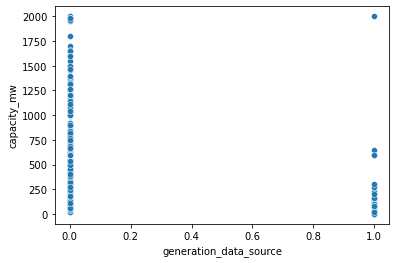

In [114]:
#density
sns.scatterplot(x='generation_data_source',y='capacity_mw',data=df1)

# Correlation

In [115]:
df.corr()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
gppd_idnr,1.000000,-0.334308,-0.105275,-0.381087,0.607373,0.367919,0.140865,-0.410407,0.856826,-0.155146,-0.160279,-0.176156,-0.187756,-0.183912,0.735795
capacity_mw,-0.334308,1.000000,0.047608,0.200473,-0.377783,-0.598462,0.215667,0.183286,-0.416879,0.756523,0.804581,0.830400,0.863989,0.877058,-0.494694
latitude,-0.105275,0.047608,1.000000,0.030775,-0.010793,-0.036834,0.084220,-0.173347,-0.078930,0.053106,0.057527,0.052797,0.046684,0.056430,-0.084126
longitude,-0.381087,0.200473,0.030775,1.000000,-0.352749,-0.279925,0.035731,0.236711,-0.426369,0.102637,0.107967,0.125723,0.148405,0.156255,-0.412071
primary_fuel,0.607373,-0.377783,-0.010793,-0.352749,1.000000,0.477575,-0.065716,-0.419911,0.500012,-0.228761,-0.240407,-0.249826,-0.260900,-0.263818,0.481758
other_fuel1,0.367919,-0.598462,-0.036834,-0.279925,0.477575,1.000000,-0.258445,-0.182706,0.449480,-0.423932,-0.451019,-0.461464,-0.482225,-0.493602,0.524955
commissioning_year,0.140865,0.215667,0.084220,0.035731,-0.065716,-0.258445,1.000000,-0.048154,0.138159,0.052258,0.086131,0.118738,0.151269,0.164514,0.002992
geolocation_source,-0.410407,0.183286,-0.173347,0.236711,-0.419911,-0.182706,-0.048154,1.000000,-0.406483,0.086918,0.090000,0.094359,0.097685,0.096969,-0.348041
year_of_capacity_data,0.856826,-0.416879,-0.078930,-0.426369,0.500012,0.449480,0.138159,-0.406483,1.000000,-0.213830,-0.221411,-0.232135,-0.240317,-0.238557,0.856225
generation_gwh_2013,-0.155146,0.756523,0.053106,0.102637,-0.228761,-0.423932,0.052258,0.086918,-0.213830,1.000000,0.970385,0.907385,0.878836,0.839297,-0.249735


<AxesSubplot:>

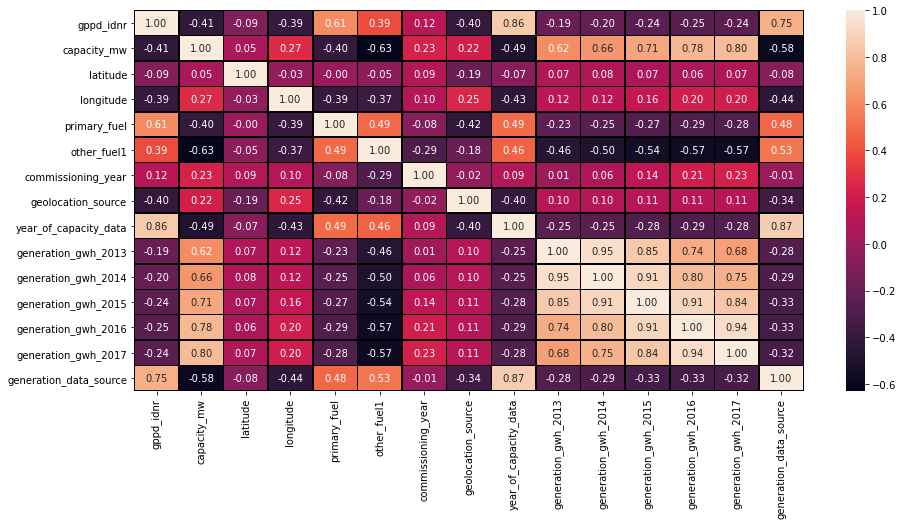

In [116]:
#Correlation using heatmap

plt.figure(figsize=(15,7))
sns.heatmap(df1.corr(), annot=True, linewidth=0.5,linecolor="black", fmt='.2f')

In [117]:
df1.describe()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
count,845.000000,845.000000,845.000000,845.00000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000,845.000000
mean,464.803550,265.696936,21.160395,76.96801,3.274556,2.796450,1999.215385,1.738462,0.457988,1172.104405,1218.695357,1177.051692,1224.811015,1313.790401,0.527811
std,265.940193,417.457690,6.124568,4.21815,2.329062,0.402877,11.092182,0.719729,0.498527,1403.735099,1490.878260,1544.926160,1611.331786,1660.055717,0.499522
min,0.000000,0.000000,8.168900,68.64470,0.000000,2.000000,1959.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,231.000000,16.500000,16.931200,74.26730,1.000000,3.000000,2000.000000,2.000000,0.000000,797.063475,805.760000,701.027250,716.728350,807.601700,0.000000
50%,480.000000,50.400000,21.778300,76.71925,3.000000,3.000000,2000.000000,2.000000,0.000000,797.063475,805.760000,701.027250,716.728350,807.601700,1.000000
75%,695.000000,330.000000,25.138600,78.92150,6.000000,3.000000,2003.000000,2.000000,1.000000,797.063475,805.760000,701.027250,716.728350,807.601700,1.000000
max,907.000000,2000.000000,34.649000,91.56500,7.000000,3.000000,2018.000000,3.000000,1.000000,8965.595000,9335.000000,9453.000000,9887.200000,9271.610000,1.000000


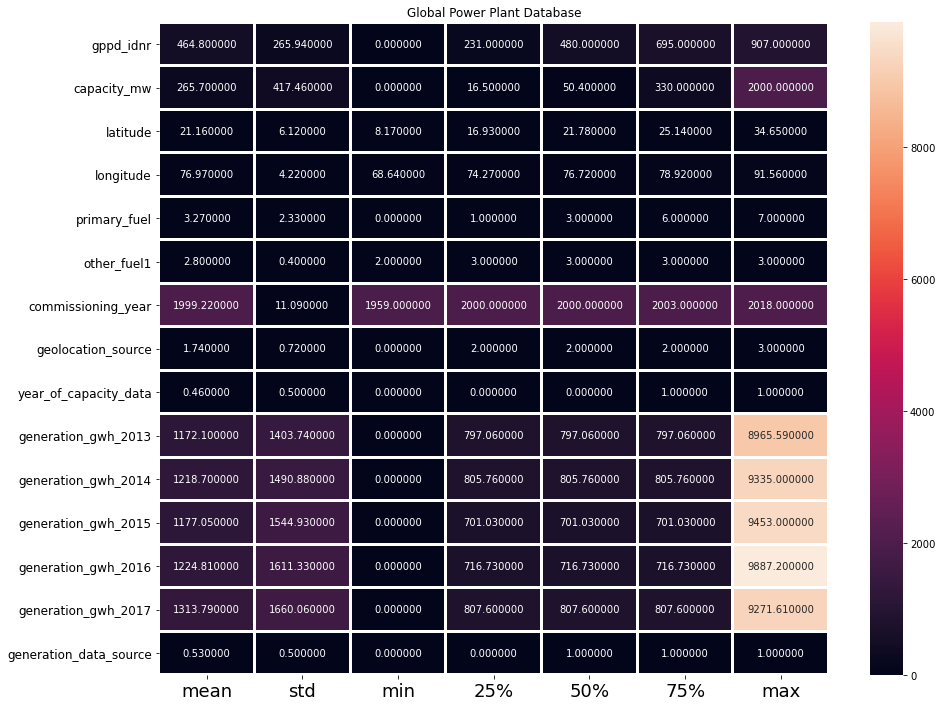

In [118]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df1.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Global Power Plant Database")
plt.show()

<AxesSubplot:xlabel='gppd_idnr', ylabel='Density'>

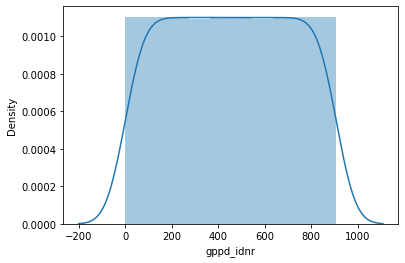

In [119]:
sns.distplot(df['gppd_idnr'])

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

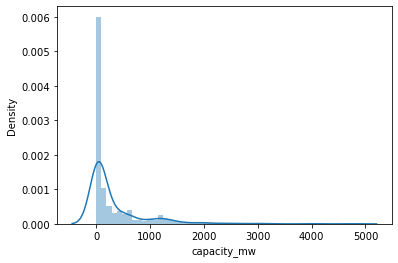

In [120]:
sns.distplot(df['capacity_mw'])

<AxesSubplot:xlabel='latitude', ylabel='Density'>

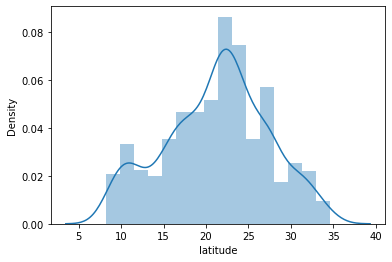

In [121]:
sns.distplot(df['latitude'])

<AxesSubplot:xlabel='longitude', ylabel='Density'>

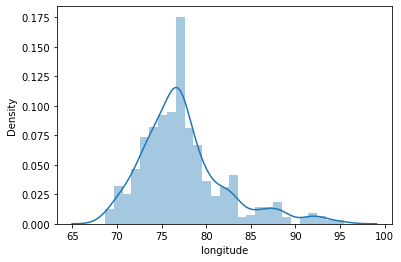

In [122]:
sns.distplot(df['longitude'])

<AxesSubplot:xlabel='primary_fuel', ylabel='Density'>

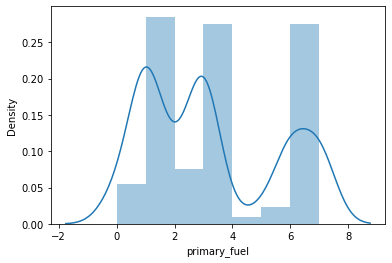

In [123]:
sns.distplot(df['primary_fuel'])

<AxesSubplot:xlabel='other_fuel1', ylabel='Density'>

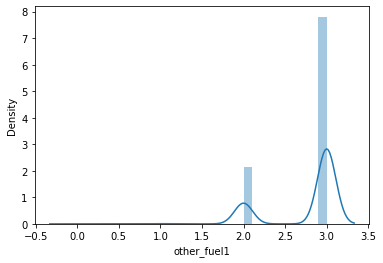

In [124]:
sns.distplot(df['other_fuel1'])

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

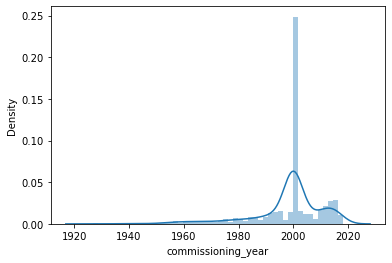

In [125]:
sns.distplot(df['commissioning_year'])

<AxesSubplot:xlabel='geolocation_source', ylabel='Density'>

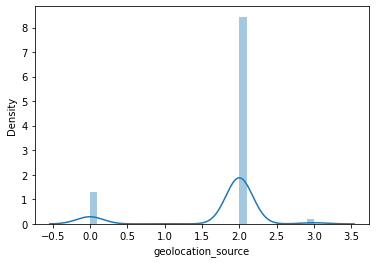

In [126]:
sns.distplot(df['geolocation_source'])

<AxesSubplot:xlabel='year_of_capacity_data', ylabel='Density'>

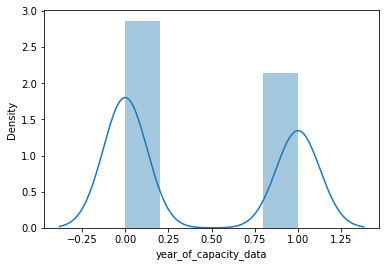

In [127]:
sns.distplot(df['year_of_capacity_data'])

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='Density'>

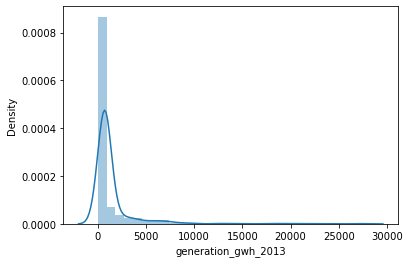

In [128]:
sns.distplot(df['generation_gwh_2013'])

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

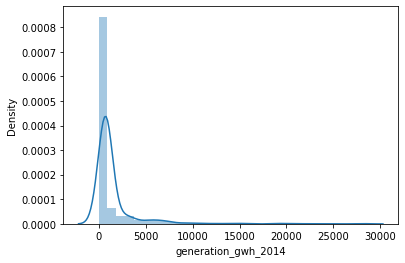

In [129]:
sns.distplot(df['generation_gwh_2014'])

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

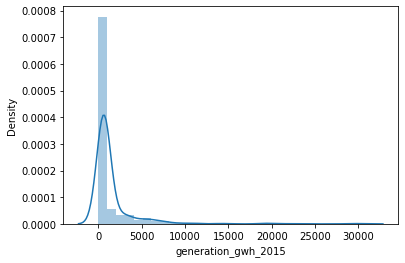

In [130]:
sns.distplot(df['generation_gwh_2015'])

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

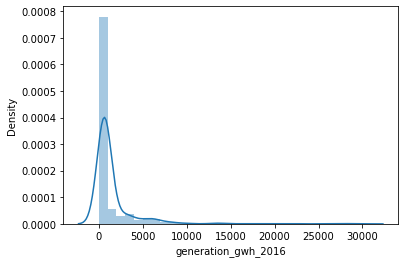

In [131]:
sns.distplot(df['generation_gwh_2016'])

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

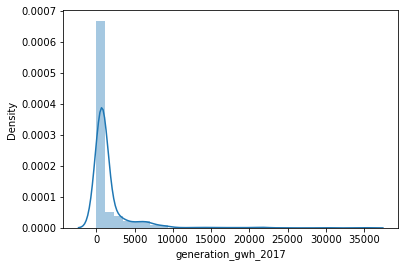

In [132]:
sns.distplot(df['generation_gwh_2017'])

<AxesSubplot:xlabel='generation_data_source', ylabel='Density'>

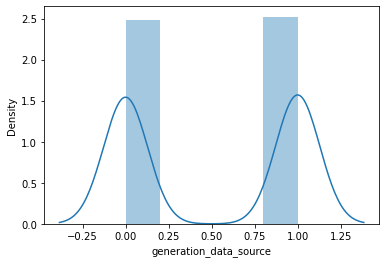

In [133]:
sns.distplot(df['generation_data_source'])

In [134]:
# check the skewness
df.skew()

gppd_idnr                 0.000000
capacity_mw               3.193257
latitude                 -0.161811
longitude                 1.150963
primary_fuel              0.471141
other_fuel1              -1.619441
commissioning_year       -1.650230
geolocation_source       -1.922080
year_of_capacity_data     0.294357
generation_gwh_2013       5.535740
generation_gwh_2014       5.325540
generation_gwh_2015       5.565770
generation_gwh_2016       5.278233
generation_gwh_2017       5.312975
generation_data_source   -0.017651
dtype: float64

# Removing Outliers:
Z-Score Technique

In [135]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df1))

In [136]:
threshold=3
np.where(z>3)

(array([  3,   4,   4,   4,  12,  12,  12,  12,  12,  44,  44,  44,  44,
         44,  57,  58,  61,  61,  75,  75,  78,  78,  78,  90,  93,  93,
        103, 107, 146, 146, 146, 160, 160, 165, 165, 185, 213, 215, 222,
        246, 253, 272, 272, 280, 280, 286, 289, 289, 289, 289, 300, 300,
        300, 300, 301, 301, 323, 323, 323, 339, 339, 350, 350, 350, 350,
        350, 352, 352, 352, 352, 352, 356, 360, 360, 371, 371, 371, 371,
        371, 372, 372, 372, 372, 395, 397, 397, 427, 427, 427, 432, 432,
        432, 432, 432, 446, 448, 448, 449, 449, 451, 451, 452, 455, 456,
        467, 492, 496, 496, 496, 496, 496, 503, 503, 510, 530, 530, 530,
        532, 542, 542, 551, 559, 579, 579, 579, 579, 579, 584, 584, 591,
        591, 591, 602, 603, 603, 603, 603, 606, 609, 610, 611, 611, 611,
        611, 611, 634, 638, 647, 647, 647, 647, 647, 655, 655, 661, 666,
        675, 687, 687, 687, 689, 692, 692, 730, 735, 735, 735, 739, 739,
        739, 739, 761, 761, 761, 783, 783, 783, 783

In [137]:
df11=df1[(z<3).all(axis=1)]
df11

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,658,2.5,28.1839,73.2407,6,3,2011.0,1,1,797.063475,805.76000,701.02725,716.72835,807.6017,1
1,520,98.0,24.7663,74.6090,1,3,2000.0,2,1,797.063475,805.76000,701.02725,716.72835,807.6017,1
2,854,39.2,21.9038,69.3732,7,3,2000.0,2,1,797.063475,805.76000,701.02725,716.72835,807.6017,1
5,2,250.0,23.7689,68.6447,1,2,2005.0,2,0,821.798000,1153.42100,1208.85200,1175.76500,1147.9130,0
6,3,60.0,10.4547,77.0078,3,3,1970.0,2,0,147.568450,157.55825,152.19520,61.42135,89.6296,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,493,106.6,13.1156,77.5838,5,3,1993.0,2,0,20.900000,0.00000,0.00000,0.00000,807.6017,0
904,823,3.0,12.8932,78.1654,6,3,2000.0,0,1,797.063475,805.76000,701.02725,716.72835,807.6017,1
905,892,25.5,15.2758,75.5811,7,3,2000.0,2,1,797.063475,805.76000,701.02725,716.72835,807.6017,1
906,540,80.0,24.3500,73.7477,1,3,2000.0,2,1,797.063475,805.76000,701.02725,716.72835,807.6017,1


In [138]:
df1.shape

(845, 15)

In [139]:
percentage_loss=((845-758)/845)*100
print(percentage_loss)

10.29585798816568


In [140]:
x = df1[['gppd_idnr', 'primary_fuel', 'latitude', 'longitude',
       'other_fuel1', 'commissioning_year', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_data_source']]
y = df1['capacity_mw']

In [141]:
x

,gppd_idnr,primary_fuel,latitude,longitude,other_fuel1,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,658,6,28.1839,73.2407,3,2011.0,1,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
1,520,1,24.7663,74.6090,3,2000.0,2,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
2,854,7,21.9038,69.3732,3,2000.0,2,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
3,0,2,23.8712,91.3602,3,2004.0,2,0,631.777928,617.789264,843.747000,886.004428,663.774500,0
4,1,1,21.9603,82.4091,2,2015.0,2,0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,494,1,16.2949,77.3568,2,2016.0,2,0,797.063475,805.760000,0.994875,233.596650,865.400000,0
904,823,6,12.8932,78.1654,3,2000.0,0,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
905,892,7,15.2758,75.5811,3,2000.0,2,1,797.063475,805.760000,701.027250,716.728350,807.601700,1
906,540,1,24.3500,73.7477,3,2000.0,2,1,797.063475,805.760000,701.027250,716.728350,807.601700,1


In [142]:
y

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
903    1600.0
904       3.0
905      25.5
906      80.0
907      16.5
Name: capacity_mw, Length: 845, dtype: float64

In [143]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

# Regression Model Building:

In [144]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [145]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0, the training accuracy is:- 0.7395158733502867
At random state 0, the testing accuracy is:- 0.6646733290819337


At random state 1, the training accuracy is:- 0.7391474655321699
At random state 1, the testing accuracy is:- 0.6490577293558722


At random state 2, the training accuracy is:- 0.7065814818749723
At random state 2, the testing accuracy is:- 0.7837467689602916


At random state 3, the training accuracy is:- 0.7134008027584453
At random state 3, the testing accuracy is:- 0.7421054563602948


At random state 4, the training accuracy is:- 0.7375799680892432
At random state 4, the testing accuracy is:- 0.656157060614074


At random state 5, the training accuracy is:- 0.7403816402912187
At random state 5, the testing accuracy is:- 0.6560837803838412


At random state 6, the training accuracy is:- 0.7200420506768392
At random state 6, the testing accuracy is:- 0.7359415727174181


At random state 7, the training accuracy is:- 0.7116911543471497
At random state 7, 

# Approaching Regularization:

In [169]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import r2_score

In [170]:
rdg=Ridge(alpha=.0001,random_state=2)
rdg.fit(x_train,y_train)
rdg.score(x_train,y_train)

0.7395158733502563

In [171]:
rdg.coef_

array([  25.9500539 ,  -15.14378186,  -28.65164587,  -22.71015817,
        -39.14328738,   50.35073441,    1.0498549 ,  -30.29912848,
         11.08748964,   -1.38628139,    5.07114435,   81.89691968,
        140.85578989, -203.3568995 ])

In [172]:
predict=rdg.predict(x_test)

In [173]:
r2_score(y_test,predict)

0.66467333957356

In [174]:
lso=Lasso(alpha=.0001,random_state=2)
lso.fit(x_train,y_train)
lso.score(x_train,y_train)

0.7395158733472351

In [175]:
predict1=lso.predict(x_test)

r2_score(y_test,predict1)

0.6646732297328966

In [176]:
ela=ElasticNet(alpha=.0001,random_state=2)
ela.fit(x_train,y_train)
ela.score(x_train,y_train)


predict2=ela.predict(x_test)


r2_score(y_test,predict2)

0.6646768218120964

In [177]:
#Cross_validation of the model:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

In [178]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.6827751854428848 and accuracy score for training is 0.7395158733502867 and accuracy for the testing is 0.6646733290819337


At cross fold 3 the cv score is 0.6958352581349022 and accuracy score for training is 0.7395158733502867 and accuracy for the testing is 0.6646733290819337


At cross fold 4 the cv score is 0.6922702964887486 and accuracy score for training is 0.7395158733502867 and accuracy for the testing is 0.6646733290819337


At cross fold 5 the cv score is 0.7004581055340527 and accuracy score for training is 0.7395158733502867 and accuracy for the testing is 0.6646733290819337


At cross fold 6 the cv score is 0.6960666139376586 and accuracy score for training is 0.7395158733502867 and accuracy for the testing is 0.6646733290819337


At cross fold 7 the cv score is 0.6896714902730287 and accuracy score for training is 0.7395158733502867 and accuracy for the testing is 0.6646733290819337


At cross fold 8 the cv score is 0.6999506587014612 a

Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score

# Approaching more regressors

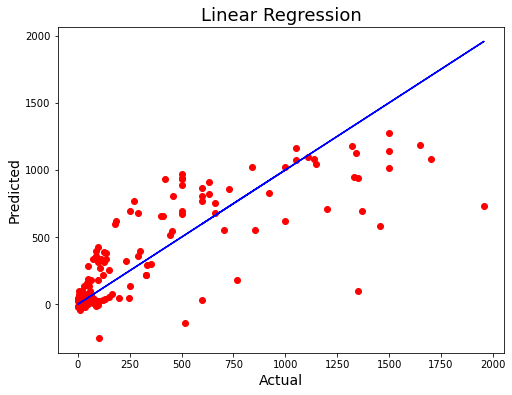

In [179]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization:

In [180]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.svm import SVR

In [181]:
dtc = DecisionTreeRegressor()
dtc.fit(x_train,y_train)
print('dtc score:',dtc.score(x_train,y_train))

dtcpredict = dtc.predict(x_test)
print('dtc r2_score:', r2_score(y_test,dtcpredict))

print("Mean squared error of dtc =",mean_squared_error(y_test,dtcpredict))
print("Root Mean squared error of dtc =",np.sqrt(mean_squared_error(y_test,dtcpredict)))

dtc score: 1.0
dtc r2_score: 0.4450078185974963
Mean squared error of dtc = 110324.9427154852
Root Mean squared error of dtc = 332.1519873724756


In [182]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
print('dtc score:',knr.score(x_train,y_train))

knrpredict = knr.predict(x_test)
print('dtc r2_score:', r2_score(y_test,knrpredict))

print("Mean squared error of dtc =",mean_squared_error(y_test,knrpredict))
print("Root Mean squared error of dtc =",np.sqrt(mean_squared_error(y_test,knrpredict)))

dtc score: 0.8492510279818433
dtc r2_score: 0.7144739448335806
Mean squared error of dtc = 56758.71973621207
Root Mean squared error of dtc = 238.24088594574204


In [183]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,random_state=42)
#RandomForestClassifier(100)----Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

print(predrf)

print('Rf score:',rf.score(x_train,y_train))

print('rf r2_score:', r2_score(y_test,predrf))

[  34.0844  1186.35    1250.85     157.1997   923.8466    27.664
   56.0022    42.23      37.763     58.748    624.668     12.96
    6.143     46.13      53.3556    23.077    152.6093   174.8374
   10.863    305.2924    46.922   1184.3      670.144   1238.0916
    5.       377.708     16.89     164.368    144.6755   782.659
   26.2894    53.175     58.2875  1239.        18.8986  1268.1
   56.515     14.127     21.8575   826.798    722.684     11.4335
   57.1145     6.24     159.6592    17.256    273.5428    18.7365
   12.2315   436.0095   252.422    129.033     49.666     48.6946
  419.9528   260.03982   20.5766    16.4905    85.5675    28.2035
  118.0923   948.13066   40.5866   442.16     440.94158  529.52
  429.78      22.213    950.0648   670.748   1086.98     175.6884
  273.2754    21.603    138.6574  1314.0172    81.4952    17.738
   86.25      14.734    940.544      6.493    705.278     61.9592
  260.9991  1070.974     25.352   1241.9       22.698     58.13
  410.7943    20.035  

In [184]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=50,random_state=42)

ada.fit(x_train,y_train)
predata=ada.predict(x_test)

print(predata)

print('Rf score: ',ada.score(x_train,y_train))
print('ADA r2_score:', r2_score(y_test,predata))

[ 282.31448133 1230.36285714 1245.94827586  282.31448133  776.51077844
  238.91183692  282.31448133  238.91183692  238.91183692  282.31448133
  735.41569767  238.91183692  238.91183692  282.31448133  294.57
  238.91183692  282.31448133  282.31448133  249.26751004  502.37375
  282.31448133 1230.36285714  799.55307263 1263.20512821  238.91183692
  650.25446429  249.26751004  356.90577078  324.91911392  741.78736962
  238.91183692  238.91183692  289.35780876 1263.20512821  238.91183692
 1230.36285714  282.31448133  238.91183692  238.91183692  876.86567164
  799.55307263  238.91183692  282.31448133  238.91183692  282.31448133
  249.26751004  307.04364516  238.91183692  249.26751004  282.31448133
  320.84622776  294.57        282.31448133  282.31448133  502.37375
  336.57707113  282.31448133  249.26751004  320.84622776  238.91183692
  282.31448133 1069.76744186  238.91183692  686.42819149  650.25446429
  775.40184049  650.25446429  238.91183692  882.57866667  656.90740741
 1127.46153846  32

In [185]:
from sklearn.ensemble import GradientBoostingRegressor
grid = GradientBoostingRegressor()

grid.fit(x_train,y_train)
predgrid=ada.predict(x_test)

print(predgrid)

print('Rf score: ',grid.score(x_train,y_train))

print('ADA r2_score:', r2_score(y_test,predgrid))

[ 282.31448133 1230.36285714 1245.94827586  282.31448133  776.51077844
  238.91183692  282.31448133  238.91183692  238.91183692  282.31448133
  735.41569767  238.91183692  238.91183692  282.31448133  294.57
  238.91183692  282.31448133  282.31448133  249.26751004  502.37375
  282.31448133 1230.36285714  799.55307263 1263.20512821  238.91183692
  650.25446429  249.26751004  356.90577078  324.91911392  741.78736962
  238.91183692  238.91183692  289.35780876 1263.20512821  238.91183692
 1230.36285714  282.31448133  238.91183692  238.91183692  876.86567164
  799.55307263  238.91183692  282.31448133  238.91183692  282.31448133
  249.26751004  307.04364516  238.91183692  249.26751004  282.31448133
  320.84622776  294.57        282.31448133  282.31448133  502.37375
  336.57707113  282.31448133  249.26751004  320.84622776  238.91183692
  282.31448133 1069.76744186  238.91183692  686.42819149  650.25446429
  775.40184049  650.25446429  238.91183692  882.57866667  656.90740741
 1127.46153846  32

The best model is RandomForestRegressor.Since the difference between the percentage score of cross validation and r2_score is optimum.


# Model Saving:

In [186]:
# Saving our data.
import pickle
filename = 'ggllobal power plant'
pickle.dump(lr, open(filename, 'wb'))


# Conclusion:

In [187]:
import numpy as np
a=np.array(y_test)
a

array([6.00000e+02, 1.11000e+03, 1.34000e+03, 7.20000e+01, 5.00000e+02,
       1.66500e+02, 1.50000e+01, 3.00000e+01, 2.00000e+02, 5.40000e+01,
       1.95600e+03, 3.60000e+00, 2.10000e+01, 1.20000e+02, 6.00000e+01,
       2.60000e+01, 2.90000e+02, 4.80000e+01, 9.00000e+00, 4.45674e+02,
       3.00000e+01, 1.05000e+03, 5.00000e+02, 1.50000e+03, 5.00000e+00,
       1.86200e+02, 3.75000e+00, 1.36500e+02, 1.05700e+02, 4.00000e+02,
       1.89000e+01, 1.02000e+02, 2.00000e+01, 1.05000e+03, 2.40000e+01,
       1.50000e+03, 3.28000e+01, 3.60000e+00, 2.08000e+01, 5.00000e+02,
       4.60000e+02, 5.00000e+01, 3.60000e+01, 1.00000e+00, 1.26000e+02,
       2.18400e+01, 1.35000e+02, 2.00000e+00, 9.00000e+00, 1.00000e+02,
       9.60000e+01, 1.06000e+02, 6.50000e+01, 1.00000e+01, 3.31500e+02,
       1.35000e+03, 1.00000e+01, 2.10000e+01, 9.00000e+01, 7.89000e+01,
       1.50000e+02, 1.20000e+03, 3.00000e+01, 2.70000e+02, 6.60000e+02,
       5.00000e+02, 1.80000e+02, 4.10000e+01, 7.26600e+02, 6.000

In [188]:
predicteed=np.array(lr.predict(x_test))
predicteed

array([  34.11125312, 1098.3984312 , 1122.57993033,  336.22372598,
        937.83457645,   74.20704697,   42.73037233,   47.17470211,
         47.40019766,  171.32431422,  729.30111637,   72.17231101,
         68.52705776,   29.02710554,   98.28958654,   85.65483864,
        361.60980775,  286.20203395,   43.184475  ,  515.56197739,
         69.54795425, 1160.41499037,  889.8014345 , 1011.6370871 ,
         16.95967116,  622.00479411,   96.56222045,  384.77957498,
        270.81638903,  655.02438492,   57.04308421,   21.90580225,
         15.20902566, 1070.39339987,   80.94096619, 1276.0322167 ,
        -17.11983701,   56.87356418,   36.68979197,  673.24125857,
        803.84565786,   34.88947183,   56.62470333,   31.9106938 ,
        387.04458028,   69.51479627,  340.32286595,   48.34864005,
        -44.08876787, -250.59446288,  428.31762859,  326.18403664,
         26.21799252,   29.88523548,  290.84013393,  101.88743317,
         37.99275305,   98.50704071,  -14.02676769,   40.28954

In [189]:
df1_com=pd.DataFrame({"original":a,"predicteed":predicteed}, index=range(len(a)))

df1_com

,original,predicteed
0,600.0,34.111253
1,1110.0,1098.398431
2,1340.0,1122.579930
3,72.0,336.223726
4,500.0,937.834576
...,...,...
164,5.0,20.828447
165,50.0,45.791074
166,40.0,18.114604
167,10.5,-37.968084


# from the above table the model is predicted the value with 97-99% percent accuracy.